### The plan is to do all the K-means coding in here

In [18]:
import pandas as pd

Massachusetts_starting_df = pd.read_csv('Massachusetts_all_outages_2020_2023.csv')

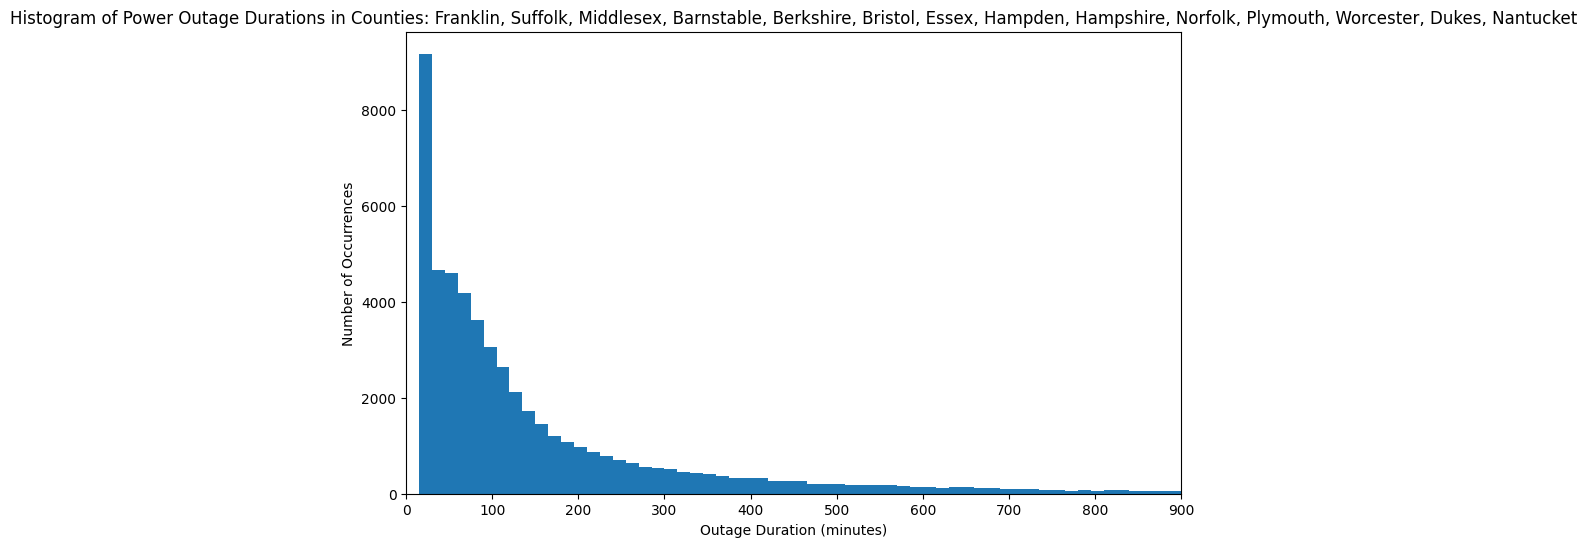

In [19]:
# Plot the histogram just to check!
import matplotlib.pyplot as plt
county_names = ["Franklin","Suffolk", "Middlesex", "Barnstable", "Berkshire", "Bristol", "Essex", "Hampden", "Hampshire", "Norfolk", "Plymouth", "Worcester", "Dukes", "Nantucket"] 


plt.figure(figsize=(10, 6)) 
plt.xlim(0, 900)
plt.hist(Massachusetts_starting_df['duration_minutes'], bins = list(range(0, 15000, 15)))  # Adjust 'bins' as needed
plt.xlabel('Outage Duration (minutes)')
plt.ylabel('Number of Occurrences')
plt.title(f'Histogram of Power Outage Durations in Counties: {", ".join(county_names)}')
plt.show()

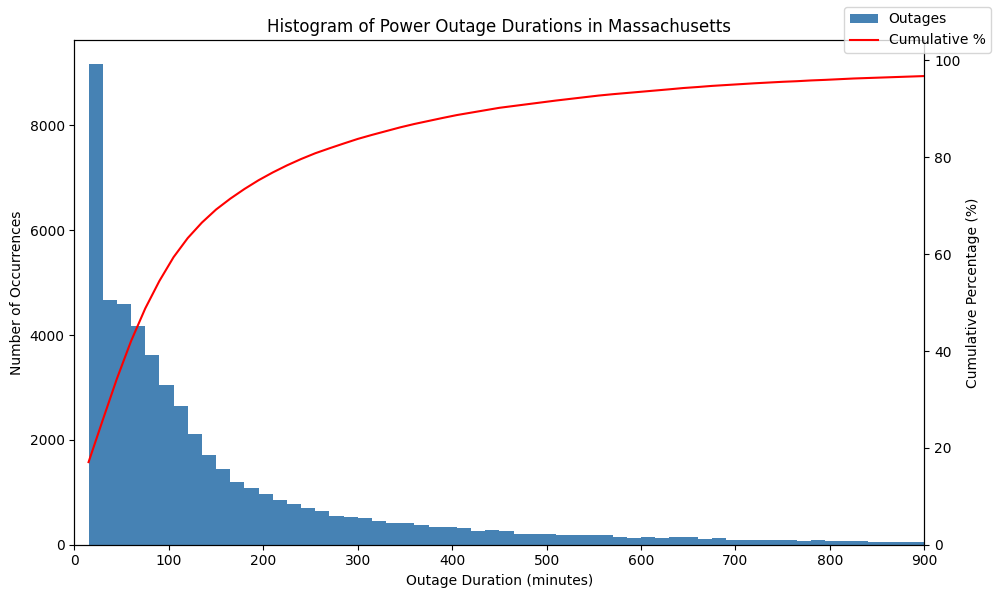

In [20]:
import matplotlib.pyplot as plt
import numpy as np

county_names = ["Franklin","Suffolk", "Middlesex", "Barnstable", "Berkshire", "Bristol", "Essex", "Hampden", "Hampshire", "Norfolk", "Plymouth", "Worcester", "Dukes", "Nantucket"] 

# Calculate histogram data
hist, bin_edges = np.histogram(Massachusetts_starting_df['duration_minutes'], bins=list(range(0, 15000, 15)))

# Calculate cumulative distribution
cumulative_hist = np.cumsum(hist)
cumulative_percentage = (cumulative_hist / len(Massachusetts_starting_df['duration_minutes'])) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Histogram
ax1.hist(Massachusetts_starting_df['duration_minutes'], bins = list(range(0, 15000, 15)), color='steelblue', label='Outages')
ax1.set_xlim(0, 900)
ax1.set_xlabel('Outage Duration (minutes)')
ax1.set_ylabel('Number of Occurrences')

# Create a second axis for the cumulative percentage
ax2 = ax1.twinx()

# Start the cumulative percentage line at 15 minutes
start_index = 1  # Since your bins start at 0 and have a width of 15, the second bin corresponds to 15 minutes

# Cumulative percentage line
ax2.plot(bin_edges[start_index:-1], cumulative_percentage[start_index:], color='red', label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.set_ylim(0, ax2.get_ylim()[1])

# Title and legend
plt.title(f'Histogram of Power Outage Durations in Massachusetts')
fig.legend(loc="upper right")

plt.tight_layout()
plt.show()

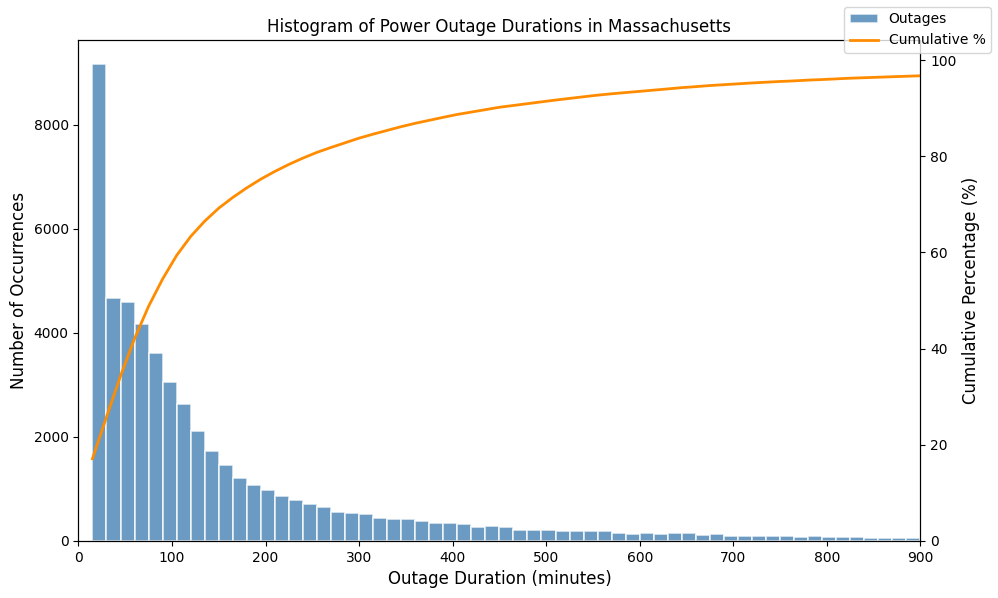

In [21]:
import matplotlib.pyplot as plt
import numpy as np

county_names = ["Franklin","Suffolk", "Middlesex", "Barnstable", "Berkshire", "Bristol", "Essex", "Hampden", "Hampshire", "Norfolk", "Plymouth", "Worcester", "Dukes", "Nantucket"] 

# Calculate histogram data
hist, bin_edges = np.histogram(Massachusetts_starting_df['duration_minutes'], bins=list(range(0, 15000, 15)))

# Calculate cumulative distribution
cumulative_hist = np.cumsum(hist)
cumulative_percentage = (cumulative_hist / len(Massachusetts_starting_df['duration_minutes'])) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Histogram
ax1.hist(Massachusetts_starting_df['duration_minutes'], bins = list(range(0, 15000, 15)), color='steelblue', edgecolor='white', linewidth=1.2, alpha=0.8, label='Outages')
ax1.set_xlim(0, 900)
ax1.set_xlabel('Outage Duration (minutes)', fontsize=12)
ax1.set_ylabel('Number of Occurrences', fontsize=12)

# Create a second axis for the cumulative percentage
ax2 = ax1.twinx()

# Start the cumulative percentage line at 15 minutes
start_index = 1  # Since your bins start at 0 and have a width of 15, the second bin corresponds to 15 minutes

# Cumulative percentage line
ax2.plot(bin_edges[start_index:-1], cumulative_percentage[start_index:], color='darkorange', linestyle='-', linewidth=2, label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12)
ax2.set_ylim(0, ax2.get_ylim()[1])

# Title and legend
plt.title(f'Histogram of Power Outage Durations in Massachusetts')
fig.legend(loc="upper right", fontsize=10)


plt.tight_layout()
plt.show()

## Regular K-means clustering

Exception in thread Thread-9 (_readerthread):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\jonas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\encodings\cp12

<Figure size 640x480 with 0 Axes>

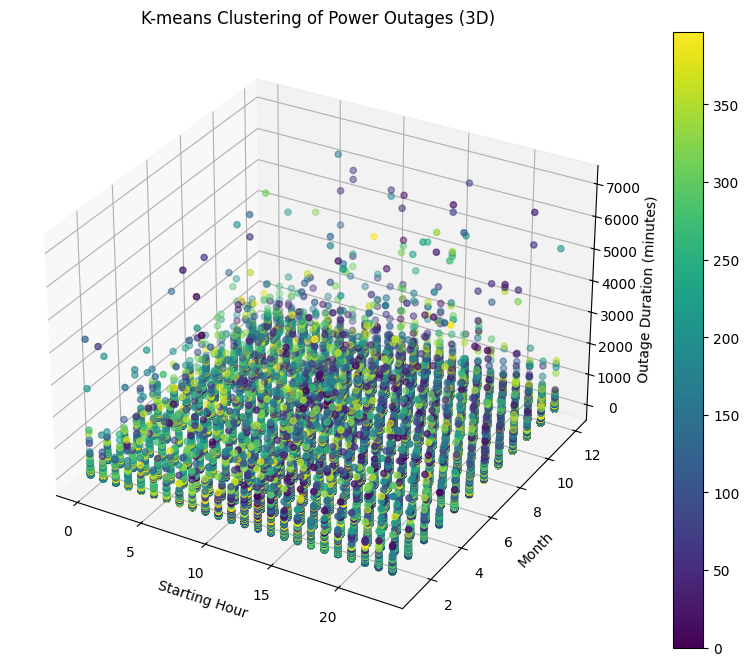

In [22]:
#3D clustering


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


# Select the columns for clustering
clustering_columns = ['hour', 'duration_minutes', 'month']

# Create a new DataFrame with only the selected columns
X = Massachusetts_starting_df[clustering_columns]

# Choose the number of clusters (k) 
k = 398 # has to be 2 lower than the actual number of clusters we are looking for!

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Get the cluster labels
Massachusetts_starting_df['cluster'] = kmeans.labels_

# 3D Visualization
fig = plt.figure()
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on cluster labels
scatter = ax.scatter(X['hour'], X['month'], X['duration_minutes'], c=Massachusetts_starting_df['cluster'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Starting Hour')
ax.set_ylabel('Month')
ax.set_zlabel('Outage Duration (minutes)')
ax.set_title('K-means Clustering of Power Outages (3D)')

# Add a colorbar
plt.colorbar(scatter)

# Show the plot
plt.show()

In [23]:
%%script false
# Elbow Method to find optimal k
inertia = []
k_range = range(1, 30)  # Adjust the range as needed

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(X)
    inertia.append(kmeans_test.inertia_)  # Inertia measures within-cluster sum of squares

# Plot the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Couldn't find program: 'false'


In [24]:
# Add cluster labels to the X DataFrame
X['cluster'] = kmeans.labels_

# Group by 'cluster' and calculate statistics, including 'month'
cluster_stats = X.groupby('cluster')[['hour', 'duration_minutes', 'month']].agg(['mean', 'median', 'count'])

# Calculate the total number of points
total_count = cluster_stats['hour']['count'].sum()

# Calculate the percentage for each cluster
cluster_stats['percentage'] = ((cluster_stats['hour']['count'] / total_count))

# Round the mean and median values to 2 decimal places
cluster_stats = cluster_stats

# Display the cluster statistics
print(cluster_stats)
cluster_stats['hour']['count'].min()

              hour              duration_minutes                    month  \
              mean median count             mean  median count       mean   
cluster                                                                     
0        13.240385   13.0   104          270.000   270.0   104   9.509615   
1        14.400000   14.0     5         2949.000  2940.0     5   5.200000   
2        11.397790   12.0   362           75.000    75.0   362   9.635359   
3        10.717949   10.0    39         1035.000  1035.0    39   6.358974   
4         8.666667    9.0     3         5465.000  5460.0     3   5.333333   
...            ...    ...   ...              ...     ...   ...        ...   
393       4.951872    5.0   187           30.000    30.0   187   2.256684   
394      13.274510   14.0   408          120.000   120.0   408   9.330882   
395      14.031250   13.5    32          570.000   570.0    32   1.562500   
396      11.000000   11.0     1         4995.000  4995.0     1  10.000000   

C:\Users\jonas\AppData\Local\Temp\ipykernel_6416\4005603516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


np.int64(1)

In [25]:
# Get the level name corresponding to 'mean'
mean_level_name = cluster_stats.columns.levels[1][1]  # Assuming 'mean' is the first level

# Round the mean values for 'hour', 'duration_minutes', and 'month' to the nearest integer
# Access the 'mean' level using `xs` with the dynamically identified level name
rounded_cluster_stats = cluster_stats[['hour', 'duration_minutes', 'month']].xs(mean_level_name, level=1, axis=1).round(0).reset_index()

# Copy the 'percentage' column from cluster_stats
rounded_cluster_stats['percentage'] = cluster_stats['percentage']

# Display the rounded_cluster_stats DataFrame
rounded_cluster_stats["duration_minutes"].max()

np.float64(7050.0)

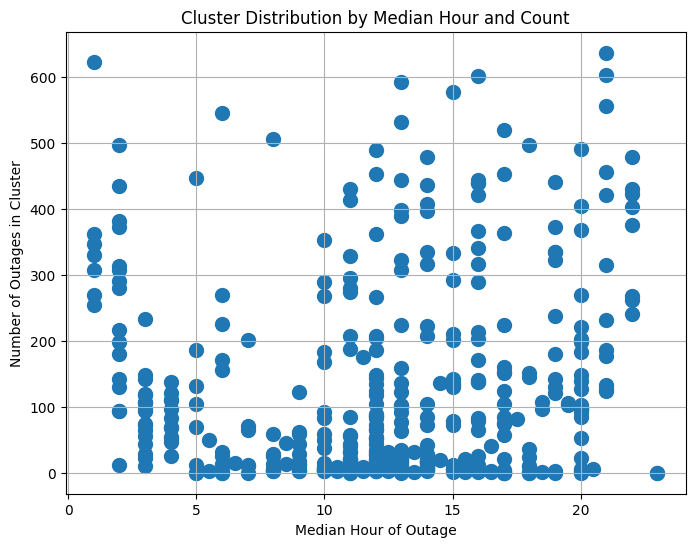

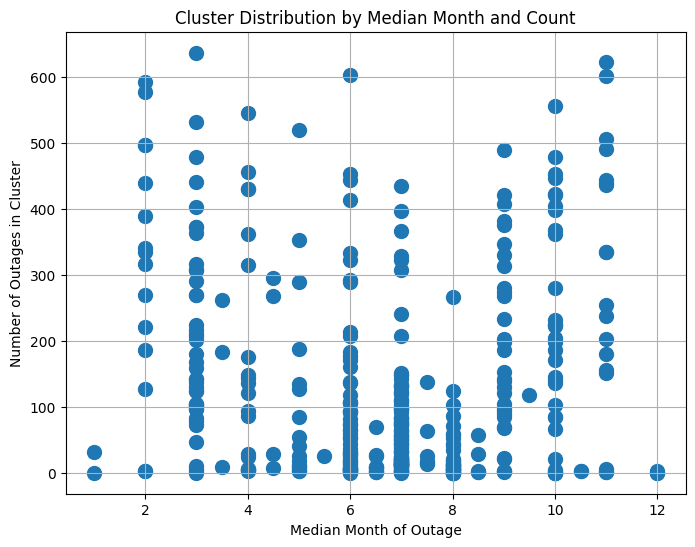

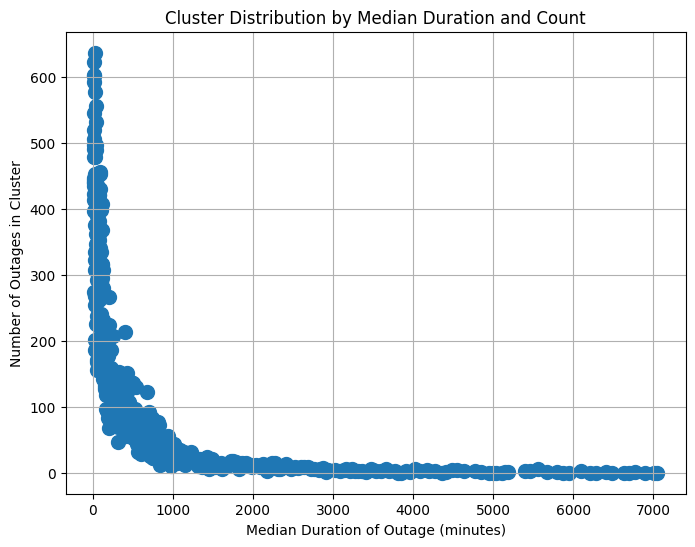

In [26]:
import matplotlib.pyplot as plt

# Assuming you have the 'cluster_stats' DataFrame available from your previous clustering

# 1. Scatter plot for Median Hour vs. Count
plt.figure(figsize=(8, 6))
plt.scatter(cluster_stats['hour']['median'], cluster_stats['hour']['count'], s=100)  # s controls marker size
plt.xlabel('Median Hour of Outage')
plt.ylabel('Number of Outages in Cluster')
plt.title('Cluster Distribution by Median Hour and Count')
plt.grid(True)
plt.show()

# 2. Scatter plot for Median Month vs. Count
plt.figure(figsize=(8, 6))
plt.scatter(cluster_stats['month']['median'], cluster_stats['month']['count'], s=100)
plt.xlabel('Median Month of Outage')
plt.ylabel('Number of Outages in Cluster')
plt.title('Cluster Distribution by Median Month and Count')
plt.grid(True)
plt.show()

# 3. Scatter plot for Median Duration vs. Count
plt.figure(figsize=(8, 6))
plt.scatter(cluster_stats['duration_minutes']['median'], cluster_stats['duration_minutes']['count'], s=100)
plt.xlabel('Median Duration of Outage (minutes)')
plt.ylabel('Number of Outages in Cluster')
plt.title('Cluster Distribution by Median Duration and Count')
plt.grid(True)
plt.show()

In [27]:
# Sort the cluster_stats DataFrame by the count of 'hour' in descending order
largest_clusters = cluster_stats.sort_values(('hour', 'count'), ascending=False)

# Select the top 10 rows (clusters)
top_10_clusters = largest_clusters.head(10)

# Display the top 10 clusters
print(top_10_clusters)

              hour              duration_minutes                   month  \
              mean median count             mean median count       mean   
cluster                                                                    
128      21.157233   21.0   636             30.0   30.0   636   3.303459   
215       1.337621    1.0   622             15.0   15.0   622  10.670418   
331      20.862126   21.0   602             15.0   15.0   602   6.382060   
327      16.434276   16.0   601             15.0   15.0   601  10.519135   
117      12.504230   13.0   591             15.0   15.0   591   2.419628   
145      15.176776   15.0   577             30.0   30.0   577   2.273830   
264      20.829137   21.0   556             45.0   45.0   556   9.678058   
207       6.583486    6.0   545             15.0   15.0   545   4.174312   
97       12.856874   13.0   531             45.0   45.0   531   2.951036   
10       16.699422   17.0   519             15.0   15.0   519   5.707129   

           

### Import the pre-modified dataframe

In [28]:
# Read CSV back into a DataFrame
electricity_demand_typical_hospital_ma = pd.read_csv('electricity_demand_typical_hospital_ma.csv')
electricity_demand_typical_hospital_ma['timestamp'] = pd.to_datetime(electricity_demand_typical_hospital_ma['timestamp'])
electricity_demand_typical_hospital_ma = electricity_demand_typical_hospital_ma.set_index('timestamp') 
electricity_demand_typical_hospital_ma.head()

,hospital_demand_ma
timestamp,
2018-01-01 00:15:00,581.864401
2018-01-01 00:30:00,582.220616
2018-01-01 00:45:00,567.352130
2018-01-01 01:00:00,582.508798
2018-01-01 01:15:00,583.235536


In [29]:
#First we find the worst period that could possible occur: Max demand +/- 240*15min to get the worst possible 5day

import pandas as pd

def find_max_and_context(df, column_name):
  """
  Finds the maximum value in a specified column of a pandas DataFrame
  and extracts the 10 rows before and after the row containing the 
  maximum value, considering a timestamp column as the index.

  Args:
    df: The pandas DataFrame with a timestamp index.
    column_name: The name of the column to search.
  """

  # Find the index of the maximum value
  max_index = df[column_name].idxmax()

  # Get a sorted list of all timestamps
  sorted_timestamps = sorted(df.index)

  # Find the position of the max_index in the sorted list
  max_position = sorted_timestamps.index(max_index)

  # Calculate start and end positions for the slice
  start_position = max(0, max_position - 239)
  end_position = min(len(df), max_position + 240)

  # Extract the timestamps for the slice
  selected_timestamps = sorted_timestamps[start_position:end_position]
  # Extract the corresponding rows from the DataFrame
  print(df.loc[selected_timestamps])

  # Extract the corresponding rows from the DataFrame
  return df.loc[selected_timestamps]  # Return the DataFrame slice



#Now you can use this corrected function to get the worst_case_data
worst_case_data = find_max_and_context(electricity_demand_typical_hospital_ma, 'hospital_demand_ma')


                     hospital_demand_ma
timestamp                              
2018-08-26 23:15:00          987.963225
2018-08-26 23:30:00          991.902525
2018-08-26 23:45:00          987.893851
2018-08-27 00:00:00          983.925867
2018-08-27 00:15:00          978.476026
...                                 ...
2018-08-31 21:45:00          774.476673
2018-08-31 22:00:00          767.881360
2018-08-31 22:15:00          770.341184
2018-08-31 22:30:00          762.949286
2018-08-31 22:45:00          759.690601

[479 rows x 1 columns]


In [30]:
# ... (your existing code)

# Divide the demand column by 1000
worst_case_data['hospital_demand_ma'] = worst_case_data['hospital_demand_ma'] / 1000

# Rename the column
worst_case_data = worst_case_data.rename(columns={'hospital_demand_ma': 'Demand_MW_z1'})

# Add a 'cluster' column with all values set to 0
worst_case_data['cluster'] = 0

# Pad or truncate the DataFrame to have exactly 480 rows
if len(worst_case_data) > 480:
    worst_case_data = worst_case_data.iloc[:480]  # Truncate if more than 480 rows
elif len(worst_case_data) < 480:
    # Create a DataFrame with zeros to pad
    padding_data = pd.DataFrame(0, index=range(480 - len(worst_case_data)), columns=worst_case_data.columns)
    
    # Concatenate the padding data to reach 480 rows
    worst_case_data = pd.concat([worst_case_data, padding_data])

# Print the modified DataFrame
print(worst_case_data)

                     Demand_MW_z1  cluster
2018-08-26 23:15:00      0.987963        0
2018-08-26 23:30:00      0.991903        0
2018-08-26 23:45:00      0.987894        0
2018-08-27 00:00:00      0.983926        0
2018-08-27 00:15:00      0.978476        0
...                           ...      ...
2018-08-31 22:00:00      0.767881        0
2018-08-31 22:15:00      0.770341        0
2018-08-31 22:30:00      0.762949        0
2018-08-31 22:45:00      0.759691        0
0                        0.000000        0

[480 rows x 2 columns]


In [31]:
# slicing the demand data
import random

# List to store sliced DataFrames
sliced_demand_data = []

# Iterate over each cluster in rounded_cluster_stats
for _, row in rounded_cluster_stats.iterrows():
    cluster = row['cluster']
    start_hour = int(row['hour'])
    duration_minutes = int(row['duration_minutes'])
    month = int(row['month'])

    # Filter demand data for the given month
    month_data = electricity_demand_typical_hospital_ma[electricity_demand_typical_hospital_ma.index.month == month]

    # Get all days in the month and randomly select one
    days_in_month = month_data.index.day.unique()
    random_day = random.choice(days_in_month)

    # Filter further for the specific day and hour
    start_time = pd.Timestamp(year=month_data.index[0].year, month=month, day=random_day, hour=start_hour)
    end_time = start_time + pd.Timedelta(minutes=duration_minutes-15)
    sliced_data = month_data.loc[start_time:end_time].copy() 

    # Add 'cluster' column to identify the slice
    sliced_data['cluster'] = cluster

    # Append to the list
    sliced_demand_data.append(sliced_data)

# Concatenate all sliced DataFrames into one
final_demand_data = pd.concat(sliced_demand_data)

# Display the final DataFrame
print(final_demand_data)

                     hospital_demand_ma  cluster
timestamp                                       
2018-10-21 13:00:00          752.044751      0.0
2018-10-21 13:15:00          736.123216      0.0
2018-10-21 13:30:00          720.035781      0.0
2018-10-21 13:45:00          710.274891      0.0
2018-10-21 14:00:00          695.951097      0.0
...                                 ...      ...
2018-08-03 08:45:00         1705.191775    397.0
2018-08-03 09:00:00         1740.003477    397.0
2018-08-03 09:15:00         1792.937255    397.0
2018-08-03 09:30:00         1850.764344    397.0
2018-08-03 09:45:00         1898.774340    397.0

[30123 rows x 2 columns]


In [32]:
import random

# List to store sliced DataFrames
sliced_demand_data = []

# Total desired rows in the final DataFrame
total_rows = len(rounded_cluster_stats) * 480

# Iterate over each cluster in rounded_cluster_stats
for _, row in rounded_cluster_stats.iterrows():
    cluster = row['cluster']
    start_hour = int(row['hour'])
    duration_minutes = int(row['duration_minutes'])
    month = int(row['month'])

    # Filter demand data for the given month
    month_data = electricity_demand_typical_hospital_ma[electricity_demand_typical_hospital_ma.index.month == month]

    # Get all days in the month and randomly select one
    days_in_month = month_data.index.day.unique()
    random_day = random.choice(days_in_month)

    # Filter further for the specific day and hour
    start_time = pd.Timestamp(year=month_data.index[0].year, month=month, day=random_day, hour=start_hour)
    end_time = start_time + pd.Timedelta(minutes=duration_minutes - 15)
    sliced_data = month_data.loc[start_time:end_time].copy()

    # Add 'cluster' column to identify the slice
    sliced_data['cluster'] = cluster

    # Pad with zeros to reach 480 rows for this cluster
    rows_to_add = 480 - len(sliced_data)
    if rows_to_add > 0:
        padding_data = pd.DataFrame(0, index=range(rows_to_add), columns=sliced_data.columns)
        sliced_data = pd.concat([sliced_data, padding_data])

    # Append to the list
    sliced_demand_data.append(sliced_data)

# Concatenate all sliced DataFrames into one
final_demand_data = pd.concat(sliced_demand_data)

# Ensure the final DataFrame has the exact desired number of rows
if len(final_demand_data) > total_rows:
    final_demand_data = final_demand_data.iloc[:total_rows]
elif len(final_demand_data) < total_rows:
    padding_data = pd.DataFrame(0, index=range(total_rows - len(final_demand_data)), columns=final_demand_data.columns)
    final_demand_data = pd.concat([final_demand_data, padding_data])

# Rename the column and divide values by 1000
final_demand_data.rename(columns={'hospital_demand_ma': 'Demand_MW_z1'}, inplace=True)
final_demand_data['Demand_MW_z1'] = final_demand_data['Demand_MW_z1'] / 1000

# Add 480 additional zeros at the end
additional_zeros = pd.DataFrame(0, index=range(480), columns=final_demand_data.columns)
final_demand_data = pd.concat([final_demand_data, additional_zeros])
final_demand_data = pd.concat([final_demand_data, worst_case_data])

# Display the final DataFrame
print(final_demand_data)

                     Demand_MW_z1  cluster
2018-10-07 13:00:00      1.237265      0.0
2018-10-07 13:15:00      1.215322      0.0
2018-10-07 13:30:00      1.191921      0.0
2018-10-07 13:45:00      1.198962      0.0
2018-10-07 14:00:00      1.187757      0.0
...                           ...      ...
2018-08-31 22:00:00      0.767881      0.0
2018-08-31 22:15:00      0.770341      0.0
2018-08-31 22:30:00      0.762949      0.0
2018-08-31 22:45:00      0.759691      0.0
0                        0.000000      0.0

[192000 rows x 2 columns]


In [33]:
rounded_cluster_stats['percentage'].min()
# Count how many times this minimum percentage occurs
count_min_percentage = (rounded_cluster_stats['percentage'] == 0).sum()

# Print the result
print(f"The minimum percentage value of 0 occurs {count_min_percentage} times.")

The minimum percentage value of 0 occurs 0 times.


In [34]:
import pandas as pd

# ... (your existing code for creating final_demand_data and rounded_cluster_stats)

# Create a separate DataFrame for the single-row columns (Adapt values as needed)
overall_outage_probability = 0.000634
worst_case_probability = 0.00437 #this is the probability of the worst case (given that there is an outage, thus this is the conditional probability)
summary_df = pd.DataFrame({
    'Voll': [20000],  # Replace with appropriate value
    'Demand_Segment': [1],  # Replace with appropriate value
    'Cost_of_Demand_Curtailment_per_MW': [1],  # Replace with appropriate value
    'Max_Demand_Curtailment': [0],  # Replace with appropriate value
    '$/MWh': [20000],  # Replace with appropriate value
    'Rep_Periods': [len(rounded_cluster_stats) + 2],  # Number of clusters + 2 because zero demand scenario and worst case scenario
    'Timesteps_per_Rep_Period': [480],  # Fixed value
})

# Create a DataFrame for Sub_Weights, multiplying each probability by 35040
# Add the new weight for the additional period
sub_weights = (rounded_cluster_stats['percentage'] * 480 * overall_outage_probability *(1-worst_case_probability)).tolist()
sub_weights.append((1-overall_outage_probability) * 480)
sub_weights.append((overall_outage_probability) * worst_case_probability * 480)
sub_weights_df = pd.DataFrame({'Sub_Weights': sub_weights})

# Prepare the final_demand_data for concatenation
# Reset the index to ensure proper alignment during concatenation
final_demand_data_reset = final_demand_data.reset_index(drop=True)

# Drop the 'cluster' column
final_demand_data_reset = final_demand_data_reset.drop(columns=['cluster'])

# Create the Time_Index column
num_clusters = len(rounded_cluster_stats) + 2
total_rows = num_clusters * 480 #there is the zero demand scenario and there is the worst case scenario
time_index_df = pd.DataFrame({'Time_Index': range(1, total_rows + 1)})

# Concatenate all DataFrames horizontally, including the new Time_Index column
final_df = pd.concat([summary_df, sub_weights_df, time_index_df, final_demand_data_reset], axis=1)

# Create the filename with the number of clusters
#filename = f'demand_data_regular_{num_clusters}_inkl_extreme_period.csv'

# Save to CSV
#final_df.to_csv(filename, index=False)

#print(f"Demand profile generated and saved to '{filename}'")

In [35]:
import pandas as pd
import os

# Create the directory name with the number of clusters
dir_name = f"tdr_regular_{num_clusters}_incl_extreme_period"

# Create the directory if it doesn't exist
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

# Create the filename (just 'Demand_data.csv')
filename = os.path.join(dir_name, 'Demand_data.csv')

# Save to CSV
final_df.to_csv(filename, index=False)

print(f"Demand profile generated and saved to '{filename}'")

Demand profile generated and saved to 'tdr_regular_400_incl_extreme_period\Demand_data.csv'


In [36]:
import csv
import os

def create_csv(headers, first_rows, num_clusters):
    """
    Creates a CSV file with the specified headers, first two rows of data, 
    and number of lines. The Time_Index column increases from 0 to 1 
    and then to the number of lines. The file is saved in a folder named
    'tdr_regular_{num_clusters}_incl_extreme_period'.

    Args:
        headers: A list of column headers.
        first_rows: A list of lists, where each inner list contains the 
                    first two rows of data for a column.
        num_clusters: The number of clusters (used for folder name).
    """

    # Create the directory name with the number of clusters
    dir_name = f"tdr_regular_{num_clusters}_incl_extreme_period"

    # Create the directory if it doesn't exist
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

    # Create the filename (just 'Fuels_data.csv')
    filename = os.path.join(dir_name, 'Fuels_data.csv')

    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write headers
        writer.writerow(headers)

        # Write first two rows with Time_Index 0 and 1
        for row_num in range(2):
            row = [data[row_num] for data in first_rows]
            writer.writerow(row)

        # Write remaining lines with increasing Time_Index
        # (using num_clusters for the number of lines)
        for row_num in range(3, 480*num_clusters + 2):
            row = [first_rows[col_num][1] for col_num in range(len(headers))]
            row[0] = row_num - 1  # Update Time_Index
            writer.writerow(row)

# Example usage
headers = ["Time_Index", "MA_Diesel", "MA_Biodiesel", "MA_Methanol", "MA_Hydrogen", "MA_Ammonia", "MA_Primary_Al_Air", "MA_Electricity", "None"]
first_rows = [
    [0, 1],
    [0.091152, 25.97157],
    [0.030445, 29.16218],
    [0.010549, 53.71187],
    [0.008793, 43.96493],
    [0.017017, 51.32169],
    [8.792497, 11310.8],
    [0.01085, 60.14663],
    [0, 0]
]
# Number of clusters is taken from before num_clusters

create_csv(headers, first_rows, num_clusters)

In [37]:
num_clusters

400

In [38]:
import csv
import os

def create_csv(headers, num_clusters):  # Changed num_lines to num_clusters
    """
    Creates a CSV file similar to the one provided, with the specified 
    headers and number of lines. The Time_Index column increases from 
    1 to the number of lines. All other columns have a value of 1 
    except for specific rows. The file is saved in a folder named
    'tdr_regular_{num_clusters}_incl_extreme_period'.

    Args:
        headers: A list of column headers.
        num_clusters: The number of clusters (used for folder name and number of lines).
    """

    # Create the directory name with the number of clusters
    dir_name = f"tdr_regular_{num_clusters}_incl_extreme_period"

    # Create the directory if it doesn't exist
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

    # Create the filename (just 'Generator_variability.csv')
    filename = os.path.join(dir_name, 'Generators_variability.csv')

    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write headers
        writer.writerow(headers)

        # Write data rows (using num_clusters for the number of lines)
        for row_num in range(1, num_clusters * 480+ 1):
            row = [1] * len(headers)  # Initialize row with all 1s
            row[0] = row_num         # Update Time_Index

            writer.writerow(row)

# Example usage with headers from the image
headers = ["Time_Index", "MA_Diesel_Gen", "MA_Biodiesel_Gen", "MA_Methanol_FC", 
            "MA_Hydrogen_FC", "MA_Ammonia_Gen", "MA_Primary_Al_Air_BESS", 
            "MA_Secondary_Li_Ion_BESS", "MA_Secondary_Iron_Air_BESS"]

create_csv(headers, num_clusters)